In [2]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# collect synthetic data
from msmbuilder.example_datasets import load_muller

In [3]:
trjs = load_muller(random_state=0)
print(trjs['DESCR'])

loading "/Users/joshuafass/msmbuilder_data/muller/version-1_random-state-0.pkl"...
This dataset consists of 10 trajectories simulated with Brownian dynamics
on the Muller potential, a two-dimensional, three-well potential energy
surface. The potential is defined in [1]. The dynamics are governed by the
stochastic differential equation::

dx_t/dt = -
abla V(x)/(kT) + \sqrt{2D} * R(t)

where R(t) is a standard normal white-noise process, and D=1e-2. The
dynamics are discretized with an euler integrator with timsetep dt=0.1,
and kT=1.5e4 Each trajectory is simulated for 1000000 steps, and
coordinates are are saved every 100 steps. The starting points for the
trajectories are sampled from the uniform distribution over the rectangular
box between x=(-1.5, 1.2) and y=(-0.2, 2.0).

References
----------
.. [1] Muller, Klaus, and Leo D. Brown. "Location of saddle points and minimum
energypaths by a constrained simplex optimization procedure." Theoretica
chimica acta 53.1 (1979): 75-93.



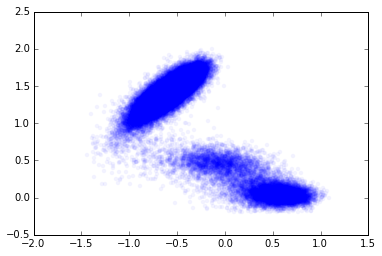

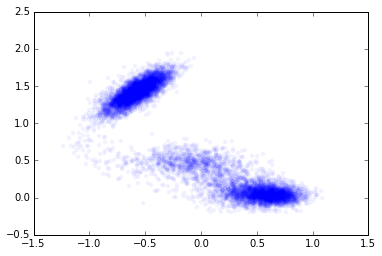

In [4]:
X = trjs['trajectories'][-1]
X_all = np.vstack(trjs['trajectories'])
plt.scatter(X_all[:,0],X_all[:,1],linewidths=0,alpha=0.05)
plt.figure()
plt.scatter(X[:,0],X[:,1],linewidths=0,alpha=0.05)

In [5]:
X.shape

(10000, 2)

In [6]:
import seaborn as sns

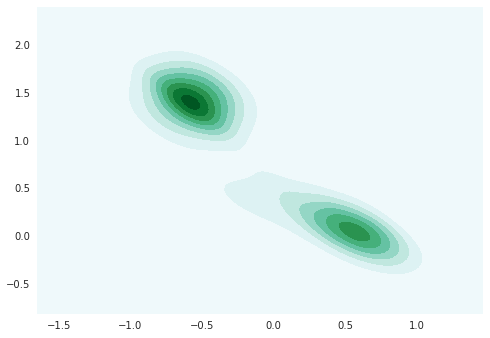

In [8]:
sns.kdeplot(X[::10,0],X[::10,1],shade=True)

In [ ]:
def naive_KDML_objective(sequence,short_lag=1,long_lag=10):
    

In [9]:
Y = np.arange(len(X))
X,Y.shape

(array([[ 0.11927011, -0.01131308],
        [ 0.42776923,  0.00956999],
        [ 0.2928911 , -0.03211848],
        ..., 
        [ 0.79090032, -0.11304074],
        [ 0.85834953, -0.18246446],
        [ 0.79374681, -0.03598576]]), (10000,))

In [30]:
# stochastic neighbor assignments
from scipy.spatial.distance import pdist,squareform
def stoch_neighbor_assignments(X):
    P = squareform(np.exp(-(pdist(X)**2)))
    P -= np.diag(P)
    return np.nan_to_num(P/P.sum(1))

#def most_likely_label(P,Y)

def exp_class_accuracy_vectorized(P,Y):
    Y_ = np.vstack([Y==y for y in Y])
    return P[Y_].sum()/len(Y)

In [31]:
P = stoch_neighbor_assignments(X)

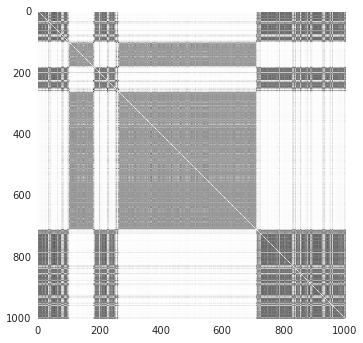

In [34]:
plt.imshow(P[::10,::10])
plt.grid('off')

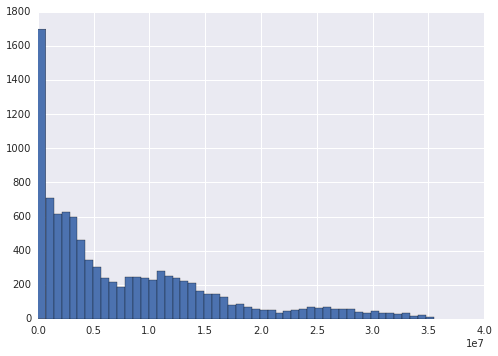

In [29]:
plt.hist(np.abs(P.dot(Y)-Y)**2,bins=50);

In [3]:
from msmbuilder.example_datasets import AlanineDipeptide,FsPeptide
dataset = FsPeptide().get()
fs_trajectories = dataset.trajectories
from msmbuilder import featurizer
dhf = featurizer.DihedralFeaturizer()
dhft = dhf.fit_transform(fs_trajectories)
X_dihedral = dhft[0]
X_dihedral.shape

loading trajectory_1.xtc...
loading trajectory_10.xtc...
loading trajectory_11.xtc...
loading trajectory_12.xtc...
loading trajectory_13.xtc...
loading trajectory_14.xtc...
loading trajectory_15.xtc...
loading trajectory_16.xtc...
loading trajectory_17.xtc...
loading trajectory_18.xtc...
loading trajectory_19.xtc...
loading trajectory_2.xtc...
loading trajectory_20.xtc...
loading trajectory_21.xtc...
loading trajectory_22.xtc...
loading trajectory_23.xtc...
loading trajectory_24.xtc...
loading trajectory_25.xtc...
loading trajectory_26.xtc...
loading trajectory_27.xtc...
loading trajectory_28.xtc...
loading trajectory_3.xtc...
loading trajectory_4.xtc...
loading trajectory_5.xtc...
loading trajectory_6.xtc...
loading trajectory_7.xtc...
loading trajectory_8.xtc...
loading trajectory_9.xtc...


(10000, 84)

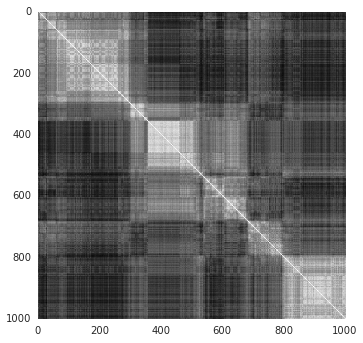

In [57]:
p = squareform(pdist(X_dihedral))
plt.imshow(p[::10,::10])
plt.grid('off')

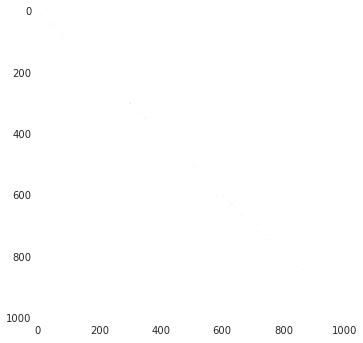

In [56]:
P_dihedral = stoch_neighbor_assignments(X_dihedral)
plt.imshow(P_dihedral[::10,::10])
plt.grid('off')

In [ ]:
dhf = featurizer.AtomPairsFeaturizer()
dhft = dhf.fit_transform(fs_trajectories)
X_dihedral = dhft[0]
print(X.shape)

P_dihedral = stoch_neighbor_assignments(X_dihedral)
plt.imshow(P_dihedral[::10,::10])
plt.grid('off')

In [65]:
from msmbuilder.decomposition import tICA
tica = tICA(3)
X_ = tica.fit_transform([X_dihedral])[0]
X_.shape

(10000, 3)

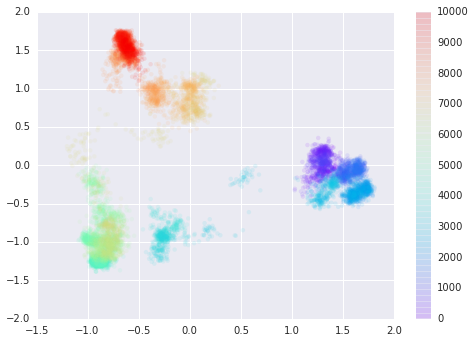

In [72]:
plt.scatter(X_[:,0],X_[:,1],linewidths=0,alpha=0.1,
            c=Y,cmap='rainbow')
plt.colorbar()

In [67]:
P_ = stoch_neighbor_assignments(X_)

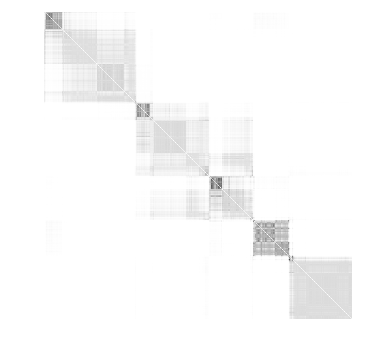

In [77]:
plt.imshow(P_)#[::5,::5])
plt.grid('off')
plt.axis('off')
plt.savefig('fspeptide_neighborhoods.pdf')

In [78]:
import autograd.numpy as np

AttributeError: type object 'float' has no attribute '__div__'

In [58]:
# to-do: set up the machinery to solve the NCA objective by
# stochastic gradient descent, then modify it to use kinetic distance
# then modify it to use weighted RMSD / weighted Binet-Cauchy

In [1]:
# idea: use SFA

In [4]:
import mdp

/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/pls.py:7: DeprecationWarning: This module has been moved to cross_decomposition and will be removed in 0.16
  "removed in 0.16", DeprecationWarning)


In [5]:
sfa = mdp.nodes.SFANode(output_dim=2,dtype='float64')

In [6]:
X_ = sfa.execute(X_dihedral)

In [7]:
sfa.get_current_train_phase()

1

<matplotlib.colorbar.Colorbar instance at 0x12d6b1248>

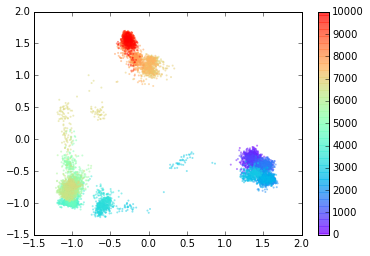

In [8]:
plt.scatter(X_[:,0],X_[:,1],linewidths=0,alpha=0.5,s=4,
            c=np.arange(len(X_)),cmap='rainbow')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x12ede1fc8>

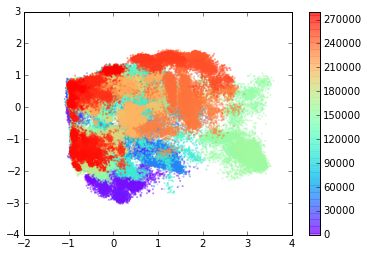

In [44]:
sfa = mdp.nodes.SFANode(output_dim=4,dtype='float64')
X_ = sfa.execute(np.vstack(dhft))
plt.scatter(X_[:,0],X_[:,1],linewidths=0,alpha=0.5,s=4,
            c=np.arange(len(X_)),cmap='rainbow')
plt.colorbar()

In [45]:
sfa.sf.shape

(84, 4)

In [46]:
sf_transformed = [np.dot(x,sfa.sf) for x in dhft]

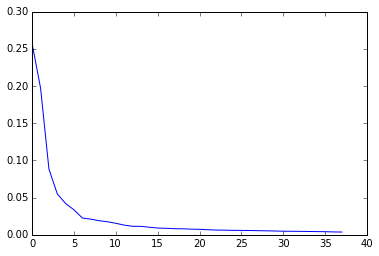

In [9]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X_dihedral)
plt.plot(pca.explained_variance_ratio_)

In [10]:
X_nl=mdp.nodes.XSFANode(output_dim=2,dtype='float64')(X_pca)

/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/mdp/nodes/expansion_nodes.py:85: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  factor = prec[lens[j]:, :]
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/mdp/nodes/expansion_nodes.py:85: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  factor = prec[lens[j]:, :]
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/mdp/nodes/expansion_nodes.py:85: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  factor = prec[lens[j]:, :]
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/mdp/nodes/expansion_nodes.py:85: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  factor = prec[lens[j]:, :]
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages

<matplotlib.colorbar.Colorbar instance at 0x10d705320>

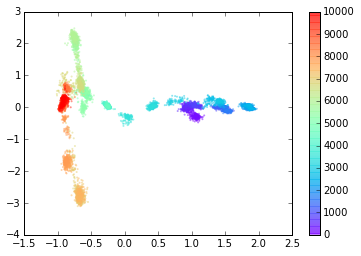

In [11]:
plt.scatter(X_nl[:,0],X_nl[:,1],linewidths=0,alpha=0.5,s=4,
            c=np.arange(len(X_)),cmap='rainbow')
plt.colorbar()

In [17]:
from msmbuilder.cluster import MiniBatchKMeans

In [13]:
from msmbuilder.cluster import LandmarkAgglomerative

In [14]:
clust = LandmarkAgglomerative(20,1000)

In [17]:
xsfa_clust = clust.fit_predict([X_nl])[0]

<matplotlib.colorbar.Colorbar instance at 0x12f7763f8>

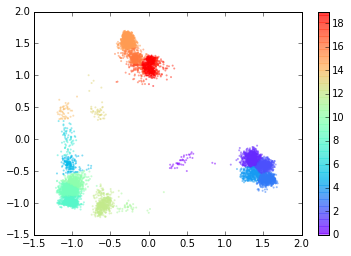

In [28]:
clust = LandmarkAgglomerative(20,1000)
sfa_clust = clust.fit_predict([X_])[0]
plt.scatter(X_[:,0],X_[:,1],linewidths=0,alpha=0.5,s=4,
            c=sfa_clust,cmap='rainbow')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x10d97bc68>

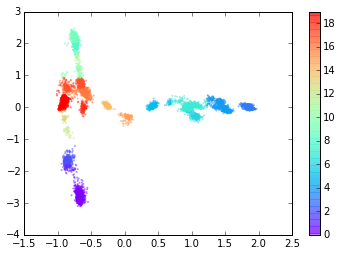

In [18]:
plt.scatter(X_nl[:,0],X_nl[:,1],linewidths=0,alpha=0.5,s=4,
            c=xsfa_clust,cmap='rainbow')
plt.colorbar()

In [20]:
from msmbuilder.msm import implied_timescales
from msmbuilder import msm

In [21]:
m = msm.MarkovStateModel()

In [22]:
m.fit(xsfa_clust)

MSM contains 3 strongly connected components above weight=1.00. Component 0 selected, with population 64.466447%


MarkovStateModel(ergodic_cutoff=1.0, lag_time=1, n_timescales=10,
         prior_counts=0, reversible_type='mle', sliding_window=True,
         verbose=True)

In [23]:
m.timescales_

array([ 1112.30808191,   701.21497636,   188.49629289,    82.59855566,
          29.05689811,    16.78902319,     7.99563081,     7.17559863,
           2.53288474,     2.13749063])

In [24]:
msm_timescales = implied_timescales([xsfa_clust], [1,4,8,12], n_timescales=10, msm=m)

MSM contains 3 strongly connected components above weight=1.00. Component 0 selected, with population 64.466447%
MSM contains 4 strongly connected components above weight=1.00. Component 0 selected, with population 54.061625%
MSM contains 7 strongly connected components above weight=1.00. Component 0 selected, with population 36.008807%
MSM contains 9 strongly connected components above weight=1.00. Component 0 selected, with population 36.023228%


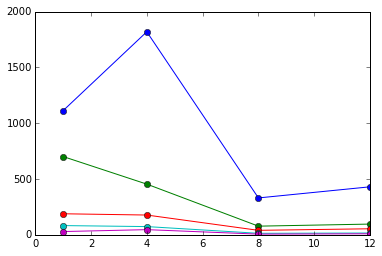

In [27]:
for i in range(5):
    plt.plot([1,4,8,12], msm_timescales[:, i], 'o-')

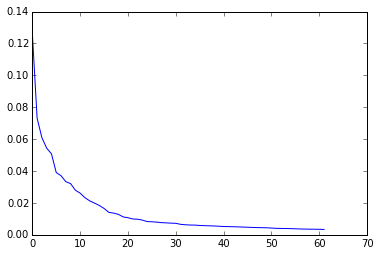

In [30]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(np.vstack(dhft))
plt.plot(pca.explained_variance_ratio_)

In [ ]:
X_nl=mdp.nodes.XSFANode(output_dim=2,dtype='float64')(X_pca)

/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/mdp/nodes/expansion_nodes.py:85: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  factor = prec[lens[j]:, :]
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/mdp/nodes/expansion_nodes.py:85: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  factor = prec[lens[j]:, :]
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/mdp/nodes/expansion_nodes.py:85: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  factor = prec[lens[j]:, :]
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/mdp/nodes/expansion_nodes.py:85: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  factor = prec[lens[j]:, :]
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages

In [1]:
plt.scatter(X_nl[:,0],X_nl[:,1],linewidths=0,alpha=0.5,s=4,
            c=np.arange(len(X_nl)),cmap='rainbow')
plt.colorbar()

NameError: name 'plt' is not defined

In [32]:
from __future__ import print_function
import numpy as np
from msmbuilder.example_datasets import load_doublewell
from msmbuilder.cluster import NDGrid
from msmbuilder.msm import MarkovStateModel
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import KFold

In [33]:
pipeline = Pipeline([
    ('clust', MiniBatchKMeans()),
    ('msm', MarkovStateModel(n_timescales=3, reversible_type='transpose', verbose=False)),
])

In [39]:
def fit_and_score(trajectories, model, n_states):
    cv = KFold(len(trajectories), n_folds=5)
    results = []

    for n in n_states:
        model.set_params(clust__n_clusters=n)
        for fold, (train_index, test_index) in enumerate(cv):
            train_data = [trajectories[i] for i in train_index]
            test_data = [trajectories[i] for i in test_index]

            # fit model with a subset of the data (training data).
            # then we'll score it on both this training data (which
            # will give an overly-rosy picture of its performance)
            # and on the test data.
            model.fit(train_data)
            train_score = model.score(train_data)
            test_score = model.score(test_data)

            results.append({
                'train_score': train_score,
                'test_score': test_score,
                'n_states': n,
                'fold': fold})
    return results

In [42]:
results = fit_and_score(sf_transformed, pipeline, [5, 10, 25])

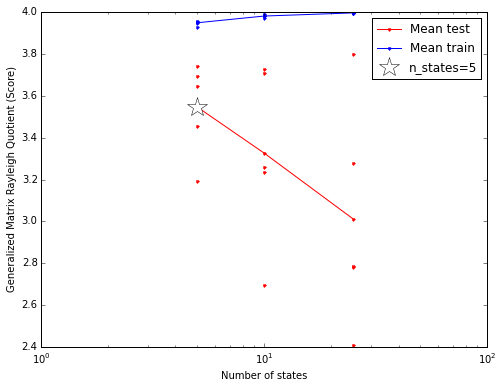

In [43]:
import pandas as pd
results = pd.DataFrame(results)
results.head()


# In[ ]:

get_ipython().magic(u'matplotlib inline')
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(results['n_states'], results['train_score'], c='b', marker='.', ls='')
plt.plot(results['n_states'], results['test_score'], c='r', marker='.', ls='')

mean_over_folds = results.groupby('n_states').aggregate(np.mean)
plt.plot(mean_over_folds.index, mean_over_folds['test_score'], c='r', marker='.', ls='-', label='Mean test')
plt.plot(mean_over_folds.index, mean_over_folds['train_score'], c='b', marker='.', ls='-', label='Mean train')
plt.semilogx()
plt.ylabel('Generalized Matrix Rayleigh Quotient (Score)')
plt.xlabel('Number of states')

best_n_states = np.argmax(mean_over_folds['test_score'])
best_test_score = mean_over_folds.ix[best_n_states]['test_score']
plt.plot(best_n_states, best_test_score, marker='*', ms=20, c='w', label='n_states=%d' % best_n_states)

plt.legend(loc='best', numpoints=1)
plt.show()

In [ ]:

# coding: utf-8

# This example demonstrates the use of the cross-validation and the generalized matrix Rayleigh quotient (GMRQ) for selecting
# MSM hyperparameters. The GMRQ is a criterion which "scores" how well the MSM eigenvectors generated on the training dataset
# serve as slow coordinates for the test dataset [1].
# 
# [1] McGibbon, R. T. and V. S. Pande, [Variational cross-validation of slow dynamical modes in molecular kinetics](http://arxiv.org/abs/1407.8083) (2014)

# In[ ]:

from __future__ import print_function
import numpy as np
from msmbuilder.example_datasets import load_doublewell
from msmbuilder.cluster import NDGrid
from msmbuilder.msm import MarkovStateModel
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import KFold


# This example uses the doublewell dataset, which consists of ten trajectories in 1D with $x \in [-\pi, \pi]$.

# In[ ]:

trajectories = load_doublewell(random_state=0).trajectories
# sub-sample a little bit, by taking only every 100th data point in each trajectory.
trajectories = [t[::100] for t in trajectories]
print([t.shape for t in trajectories])


# A `pipeline` is a way of connecting together multiple estimators, so that we can create a custom model that
# performs a sequence of steps. This model is relatively simple. It will first discretize the trajectory data
# onto an evenly spaced grid between $-\pi$ and $\pi$, and then build an MSM.

# In[ ]:

model = Pipeline([
    ('grid', NDGrid(min=X_.min(),max=X_.max())),
    ('msm', MarkovStateModel(n_timescales=1, lag_time=1, reversible_type='transpose', verbose=False))
])


# ## Cross validation 
# 
# To get an accurate indication of how well our MSMs are doing at finding the dominant eigenfunctions
# of our stochastic process, we need to consider the tendenancy of statistical models to overfit their
# training data. Our MSMs might build transition matrices which fit the noise in training data as opposed
# to the underlying signal.
# 
# One way to combat overfitting in a data-efficient way is with cross validation. This example uses 5-fold
# cross valiation.

# In[ ]:

def fit_and_score(trajectories, model, n_states):
    cv = KFold(len(trajectories), n_folds=5)
    results = []

    for n in n_states:
        model.set_params(grid__n_bins_per_feature=n)
        for fold, (train_index, test_index) in enumerate(cv):
            train_data = [trajectories[i] for i in train_index]
            test_data = [trajectories[i] for i in test_index]

            # fit model with a subset of the data (training data).
            # then we'll score it on both this training data (which
            # will give an overly-rosy picture of its performance)
            # and on the test data.
            model.fit(train_data)
            train_score = model.score(train_data)
            test_score = model.score(test_data)

            results.append({
                'train_score': train_score,
                'test_score': test_score,
                'n_states': n,
                'fold': fold})
    return results


# In[ ]:

results = fit_and_score(sf_transformed, model, [5, 10, 25, 50, 100, 200, 500, 750])


# In[ ]:

import pandas as pd
results = pd.DataFrame(results)
results.head()


# In[ ]:

get_ipython().magic(u'matplotlib inline')
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(results['n_states'], results['train_score'], c='b', marker='.', ls='')
plt.plot(results['n_states'], results['test_score'], c='r', marker='.', ls='')

mean_over_folds = results.groupby('n_states').aggregate(np.mean)
plt.plot(mean_over_folds.index, mean_over_folds['test_score'], c='r', marker='.', ls='-', label='Mean test')
plt.plot(mean_over_folds.index, mean_over_folds['train_score'], c='b', marker='.', ls='-', label='Mean train')
plt.semilogx()
plt.ylabel('Generalized Matrix Rayleigh Quotient (Score)')
plt.xlabel('Number of states')

best_n_states = np.argmax(mean_over_folds['test_score'])
best_test_score = mean_over_folds.ix[best_n_states]['test_score']
plt.plot(best_n_states, best_test_score, marker='*', ms=20, c='w', label='n_states=%d' % best_n_states)

plt.legend(loc='best', numpoints=1)
plt.show()


# This plot is very similar to figure 1 from [McGibbon and Pande](http://arxiv.org/abs/1407.8083). It shows
# that the performance on the training set keeps going up as we increase the number of states (with the
# amount of data fixed), whereas the test performance peaks and then starts going down.
# 
# We should pick the model with the highest average test set performance. In this example, we're only choosing over
# the number of MSMs states, but this method can also be used to evaluate the clustering method and any pre-processing
# like tICA.
# 
# However, you do need to fix the number of dynamical processes to "score" (this is the `n_timescales` attribute for `MarkovStateModel`), as well as the lag time.

loading "/Users/joshuafass/msmbuilder_data/doublewell/version-1_random-state-0.pkl"...
[(1001, 1), (1001, 1), (1001, 1), (1001, 1), (1001, 1), (1001, 1), (1001, 1), (1001, 1), (1001, 1), (1001, 1)]